In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

reg_season_detailed_pd = pd.read_csv('data/RegularSeasonDetailedResults.csv')
seasons_pd = pd.read_csv('data/Seasons.csv')
teams_pd = pd.read_csv('data/Teams.csv')
teamList = teams_pd['Team_Name'].tolist()
tourney_compact_pd = pd.read_csv('data/TourneyCompactResults.csv')
tourney_detailed_pd = pd.read_csv('data/TourneyDetailedResults.csv')
tourney_seeds_pd = pd.read_csv('data/TourneySeeds.csv')
tourney_seeds_pd.columns = ['Season', 'Seed', 'Team_Id']
tourney_slots_pd = pd.read_csv('data/TourneySlots.csv')
tourney_results_pd = pd.read_csv('data/TourneyResults.csv')
NCAAChampionsList = tourney_results_pd['NCAA Champion'].tolist()

In [58]:
reg_season_detailed_pd.mean()

Season    2010.222663
Daynum      71.397959
Wteam     1287.010100
Wscore      74.996816
Lteam     1281.911073
Lscore      63.024558
Numot        0.072538
Wfgm        25.928480
Wfga        54.868156
Wfgm3        6.939076
Wfga3       18.116251
Wftm        16.200780
Wfta        22.873284
Wor         11.041156
Wdr         25.480740
Wast        14.698967
Wto         13.070254
Wstl         7.073047
Wblk         3.841210
Wpf         17.506276
Lfgm        22.441333
Lfga        56.131505
Lfgm3        5.932603
Lfga3       19.150217
Lftm        12.209288
Lfta        18.133867
Lor         11.259865
Ldr         21.438710
Last        11.413161
Lto         14.419842
Lstl         6.050381
Lblk         2.868587
Lpf         19.874054
dtype: float64

In [3]:
stats_pd = pd.read_csv('data/MMStats/MMStats_2017.csv')

In [4]:
stats_pd.columns

Index(['Rk', 'School', 'G', 'W', 'L', 'W.L.', 'SRS', 'SOS', 'W.1', 'L.1',
       'W.2', 'L.2', 'W.3', 'L.3', 'Tm.', 'Opp.', 'X.', 'MP', 'FG', 'FGA',
       'FG.', 'X3P', 'X3PA', 'X3P.', 'FT', 'FTA', 'FT.', 'ORB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF'],
      dtype='object')

In [5]:
stats_pd.shape

(351, 34)

In [6]:
reg_season_detailed_2017_pd = reg_season_detailed_pd[reg_season_detailed_pd['Season'] == 2017]

In [198]:
win_team = reg_season_detailed_2017_pd.groupby(['Wteam'], as_index=False).mean()
print(win_team.shape)
win_season_stats = []
print(win_team.head())
for index, row in win_team.iterrows():
    win_season_stats.append([row['Wteam'], row['Wscore'], row['Lscore'], row['Wfgm'] / row['Wfga'] * 100, 
                         row['Wfga'], row['Wfga3'], row['Wfgm3'] / row['Wfga3'] * 100, 
                         row['Wftm'] / row['Wfta'] * 100, row['Wor'], row['Wdr'],
                         row['Wast'], row['Wto'], row['Wstl'], row['Wblk'], row['Wpf']])
win_season_stats = pd.DataFrame(win_season_stats)
win_season_stats.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']

lose_team = reg_season_detailed_2017_pd.groupby(['Lteam'], as_index=False).mean()
lose_season_stats = []
for index, row in lose_team.iterrows():
    lose_season_stats.append([row['Lteam'], row['Lscore'], row['Wscore'], row['Lfgm'] / row['Lfga'] * 100, 
                         row['Lfga'], row['Lfga3'], row['Lfgm3'] / row['Lfga3'] * 100, 
                         row['Lftm'] / row['Lfta'] * 100, row['Lor'], row['Ldr'],
                         row['Last'], row['Lto'], row['Lstl'], row['Lblk'], row['Lpf']])

lose_season_stats = pd.DataFrame(lose_season_stats)
lose_season_stats.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
season_stats = win_season_stats.append(lose_season_stats)
season_stats = season_stats.groupby(['team'], as_index=False).mean()
season_stats.shape

(351, 33)
   Wteam  Season     Daynum     Wscore        Lteam     Lscore     Numot  \
0   1101  2017.0  78.888889  74.333333  1299.222222  69.666667  0.222222   
1   1102  2017.0  60.100000  80.100000  1339.900000  66.700000  0.000000   
2   1103  2017.0  72.240000  79.720000  1237.440000  69.840000  0.000000   
3   1104  2017.0  73.315789  72.947368  1278.368421  59.000000  0.210526   
4   1105  2017.0  92.500000  83.000000  1315.500000  75.000000  0.000000   

        Wfgm       Wfga      Wfgm3    ...          Lfga3       Lftm  \
0  24.000000  49.555556   7.777778    ...      19.777778  14.666667   
1  26.000000  54.800000   9.200000    ...      26.800000  10.600000   
2  26.840000  55.240000  10.680000    ...      18.720000  12.800000   
3  24.578947  56.105263   7.473684    ...      19.157895  12.526316   
4  27.500000  53.000000  10.500000    ...      23.000000  18.500000   

        Lfta        Lor        Ldr       Last        Lto      Lstl      Lblk  \
0  23.333333  11.777778  2

(351, 15)

In [267]:
from sklearn.cluster import KMeans
import numpy as np

x = season_stats.drop(['team'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled)

kmeans = KMeans(n_clusters=6, random_state=0).fit(scaled_df)

cluster_map = pd.DataFrame()
cluster_map['Team_Id'] = season_stats.team.values
cluster_map['cluster'] = kmeans.labels_
team_name_clusters = pd.merge(cluster_map, teams_pd)
centers_df = pd.DataFrame(kmeans.cluster_centers_)
centers_df.columns = ['for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
cluster_0 = ', '.join(team_name_clusters[team_name_clusters['cluster'] == 3].Team_Name.values)


(351, 16)


Text(0,0.5,'fg%')

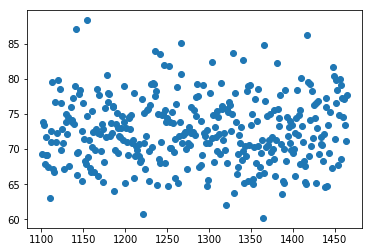

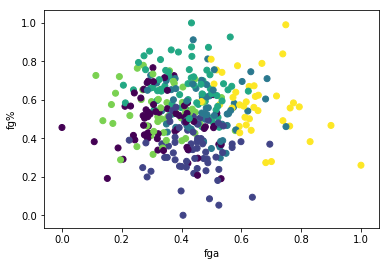

In [268]:
scaled_df.columns = ['for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
data_label = scaled_df.join(cluster_map)
print(data_label.shape)
plt.figure(0)
plt.scatter(season_stats['team'], season_stats['for'])
plt.figure(1)
plt.scatter(scaled_df['fga'], scaled_df['fg%'], c=data_label.cluster)
plt.xlabel('fga')
plt.ylabel('fg%')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136683240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1175a7518>]], dtype=object)

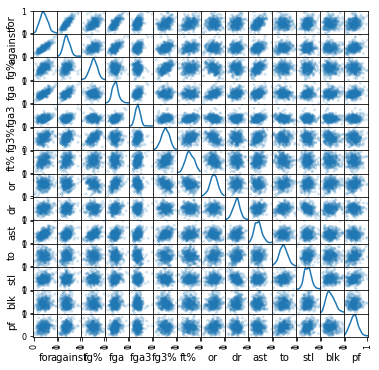

In [269]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(scaled_df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [270]:
print(tourney_seeds_pd.head())
mm_teams = tourney_seeds_pd[tourney_seeds_pd['Season'] == 2017].Team_Id.values
mm_team_clusters = cluster_map[cluster_map['Team_Id'].isin(mm_teams)]
print(mm_team_clusters)
print(pd.merge(mm_team_clusters, tourney_seeds_pd[tourney_seeds_pd['Season'] == 2017]))

   Season Seed  Team_Id
0    1985  W01     1207
1    1985  W02     1210
2    1985  W03     1228
3    1985  W04     1260
4    1985  W05     1374
Empty DataFrame
Columns: [Team_Id, cluster]
Index: []
Empty DataFrame
Columns: [cluster, Season, Seed, Team_Id]
Index: []


In [271]:
from itertools import product

cluster_0_teams = cluster_map[cluster_map['cluster'] == 0].Team_Id
cluster_1_teams = cluster_map[cluster_map['cluster'] == 1].Team_Id

c = list(product(cluster_0_teams, cluster_1_teams))
cluster_0_v_1_wins = reg_season_detailed_2017_pd[
    reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == 0].Team_Id) & 
    reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == 1].Team_Id)
]
cluster_1_v_0_wins = reg_season_detailed_2017_pd[
    reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == 1].Team_Id) & 
    reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == 0].Team_Id)
]
print("1 v 0")
print("1 wins", cluster_1_v_0_wins.shape)
print("0 wins", cluster_0_v_1_wins.shape)
cluster_0_v_2_wins = reg_season_detailed_2017_pd[
    reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == 0].Team_Id) & 
    reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == 2].Team_Id)
]
cluster_2_v_0_wins = reg_season_detailed_2017_pd[
    reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == 2].Team_Id) & 
    reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == 0].Team_Id)
]
print("2 v 0")
print("2 wins", cluster_2_v_0_wins.shape)
print("0 wins", cluster_0_v_2_wins.shape)
cluster_1_v_2_wins = reg_season_detailed_2017_pd[
    reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == 1].Team_Id) & 
    reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == 2].Team_Id)
]
cluster_2_v_1_wins = reg_season_detailed_2017_pd[
    reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == 2].Team_Id) & 
    reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == 1].Team_Id)
]
print("2 v 1")
print("2 wins", cluster_2_v_1_wins.shape)
print("1 wins", cluster_1_v_2_wins.shape)
print(reg_season_detailed_2017_pd.shape)

1 v 0
1 wins (168, 34)
0 wins (203, 34)
2 v 0
2 wins (171, 34)
0 wins (181, 34)
2 v 1
2 wins (196, 34)
1 wins (116, 34)
(5395, 34)


In [339]:
num_clusters = 12
x = season_stats.drop(['team'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled)

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(scaled_df)

cluster_map = pd.DataFrame()
cluster_map['Team_Id'] = season_stats.team.values
cluster_map['cluster'] = kmeans.labels_
print(cluster_map.groupby('cluster').count())
pairs = []
for i in range(0,num_clusters):
    for j in range(0,num_clusters):
        if(i != j):
            pairs.append([i, j])

percentages = np.zeros((num_clusters,num_clusters))
for pair in pairs:
    cluster_1_wins = reg_season_detailed_2017_pd[
        reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == pair[0]].Team_Id) & 
        reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == pair[1]].Team_Id)
    ]
    cluster_2_wins = reg_season_detailed_2017_pd[
        reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == pair[1]].Team_Id) & 
        reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == pair[0]].Team_Id)
    ]
    percentages[pair[0], pair[1]] = cluster_1_wins.shape[0] / (cluster_1_wins.shape[0] + cluster_2_wins.shape[0])
    percentages[pair[1], pair[0]] = cluster_2_wins.shape[0] / (cluster_1_wins.shape[0] + cluster_2_wins.shape[0])
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ['for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
centers['cluster'] = ['cluster ' + str(i) for i in centers.index]
centers.set_index(['cluster'])
# centers.to_csv('test.csv')
# pd.DataFrame(percentages).to_csv('test1.csv')
print(centers)
print(pd.DataFrame(percentages))

         Team_Id
cluster         
0             31
1             26
2             26
3             30
4             26
5             28
6             33
7             24
8             31
9             22
10            36
11            38
         for   against       fg%       fga      fga3      fg3%       ft%  \
0   0.362334  0.359881  0.535616  0.334611  0.309912  0.495088  0.477323   
1   0.568087  0.529036  0.639179  0.469804  0.360559  0.667943  0.588945   
2   0.270593  0.302745  0.332567  0.382323  0.352925  0.417031  0.578275   
3   0.514659  0.465318  0.691771  0.369161  0.404125  0.654026  0.684387   
4   0.413269  0.329396  0.625070  0.332826  0.378245  0.614198  0.710351   
5   0.489524  0.421037  0.445595  0.512837  0.355025  0.432831  0.673350   
6   0.445601  0.371611  0.533809  0.435843  0.356704  0.528235  0.573207   
7   0.665473  0.551072  0.566175  0.663022  0.422960  0.471324  0.479185   
8   0.261529  0.256503  0.555653  0.283636  0.292997  0.597042  0.430504   
9 

(351, 15)


Text(0,0.5,'fga')

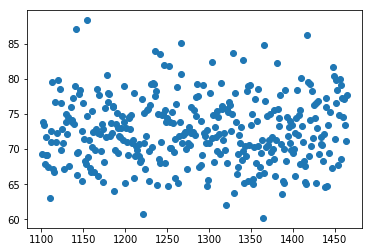

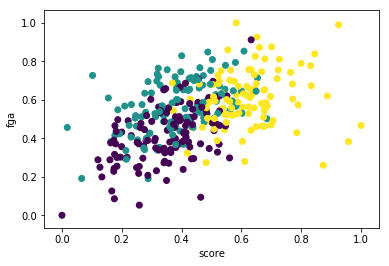

In [168]:
scaled_df.columns = ['score', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']
data_label = scaled_df.join(cluster_map)
print(data_label.shape)
plt.figure(0)
plt.scatter(season_stats['team'], season_stats['score'])
plt.figure(1)
plt.scatter(data_label['score'], data_label['fg%'], c=data_label.cluster)
plt.xlabel('score')
plt.ylabel('fga')

In [14]:
reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot,Wfgm,Wfga,Wfgm3,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,74.808709,1285.591854,75.795061,1281.750867,63.756932,0.061308,26.299393,55.367851,6.695624,...,18.720971,12.193674,18.055243,11.913345,21.115901,11.877816,15.602903,6.507582,2.768198,20.413128
1,2004,75.335156,1285.931306,74.971122,1280.900678,62.990155,0.071319,25.928681,55.069350,6.708160,...,18.825202,12.025159,18.057755,11.844235,21.224021,11.870269,15.654999,6.493984,2.741413,20.322468
2,2005,75.042567,1286.067166,74.693690,1282.088770,62.635294,0.066524,25.975187,54.949305,6.769840,...,18.922139,11.875722,17.767059,11.733690,21.038717,11.771551,15.490481,6.509733,2.806203,19.884492
3,2006,74.712634,1283.769182,74.587555,1285.425478,62.666597,0.073996,25.920538,54.881228,6.845281,...,18.882279,11.807862,17.589027,11.762035,20.874711,11.833929,15.521127,6.368089,2.836872,19.679210
4,2007,71.676780,1286.476700,74.829467,1283.896887,62.761650,0.067618,25.896887,54.196907,7.043228,...,19.453500,11.862978,17.645251,11.534404,20.671227,11.667460,15.218917,6.225858,2.760658,19.985524
5,2008,68.392020,1288.741817,74.962425,1281.907418,62.755375,0.072439,25.932597,54.543289,7.162309,...,19.622119,11.805152,17.567306,11.340306,21.026148,11.578346,15.173155,6.171025,2.836529,19.803021
6,2009,70.963612,1287.680511,74.033721,1281.312250,61.980377,0.071633,25.724138,54.550200,6.749095,...,18.787579,11.883978,17.740331,11.440846,21.195847,11.328062,14.696895,6.093161,2.777481,19.574776
7,2010,70.741212,1289.607638,74.652480,1279.997910,62.484325,0.063272,25.799734,54.756603,6.655330,...,18.618659,12.432263,18.563177,11.568687,21.415162,11.194376,14.431693,6.137374,2.888087,19.872126
8,2011,70.881243,1285.244758,74.374190,1283.078727,62.470644,0.077964,25.600839,54.468547,6.733321,...,18.551658,12.415364,18.471979,11.168319,21.326916,11.180518,14.131910,5.933283,2.961685,20.081395
9,2012,70.745479,1286.596802,73.379973,1283.055778,61.415953,0.070055,25.409100,53.963640,6.744146,...,18.435941,11.743575,17.500857,11.118409,21.167523,11.105844,14.128308,5.935656,2.888445,19.396916


Text(0,0.5,'3 fg%')

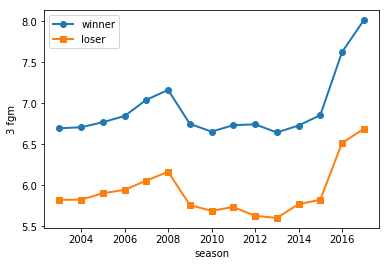

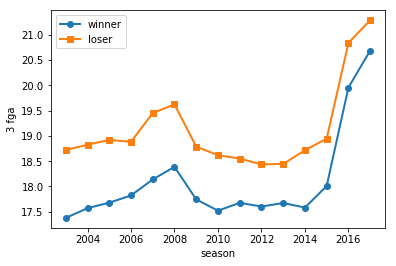

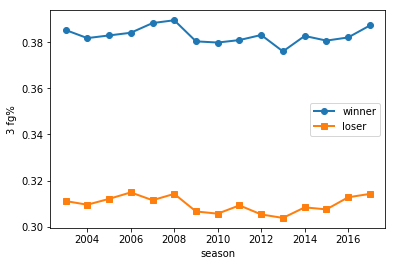

In [259]:

season_groupby = reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()
#literature review, problem statement clearer, clusters, properties 
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fga')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fg%')

Text(0,0.5,'fg%')

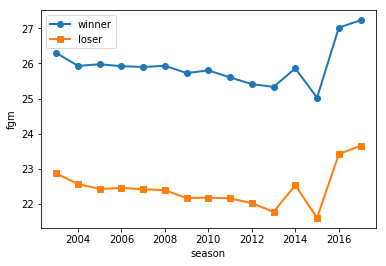

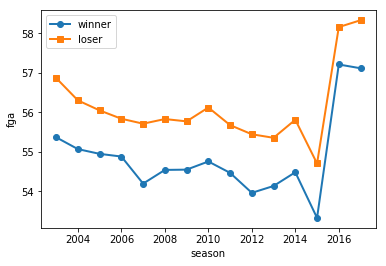

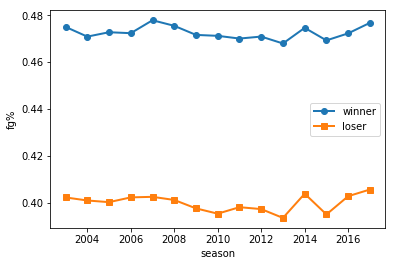

In [260]:
season_groupby = reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()
#literature review, problem statement clearer, clusters, properties 
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')

Text(0,0.5,'2 fg%')

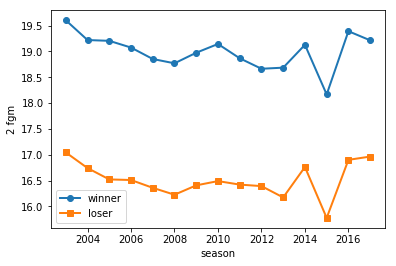

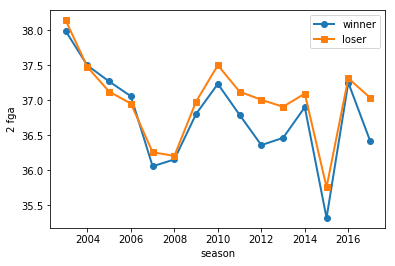

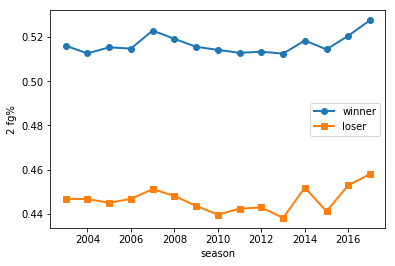

In [261]:
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'] - season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'] - season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga'] - season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'] - season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fga')
plt.figure(2)
plt.plot(season_groupby['Season'], (season_groupby['Wfgm'] - season_groupby['Wfgm3'])/(season_groupby['Wfga'] - season_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], (season_groupby['Lfgm'] - season_groupby['Lfgm3'])/(season_groupby['Lfga'] - season_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fg%')

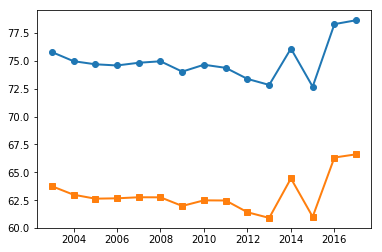

In [25]:
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wscore'], label='data1', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lscore'], label='data2', lw=2, marker='s')

Text(0,0.5,'ft%')

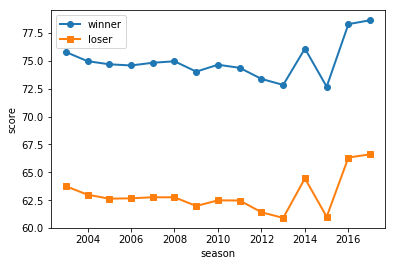

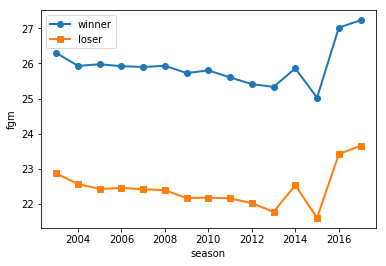

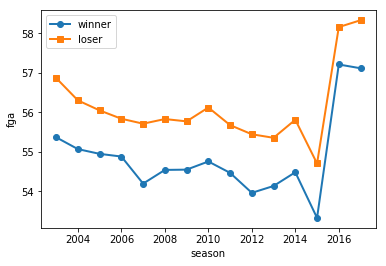

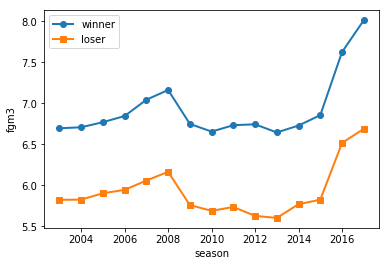

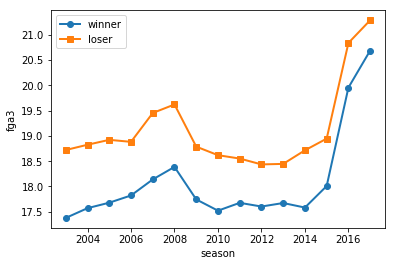

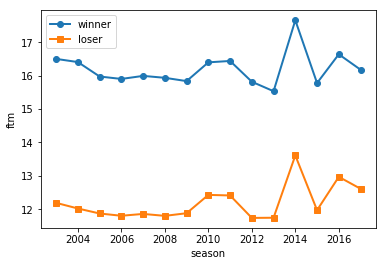

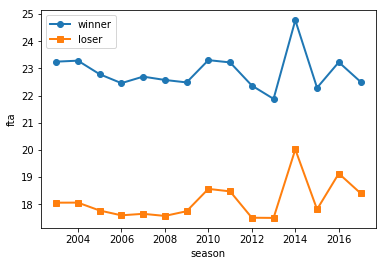

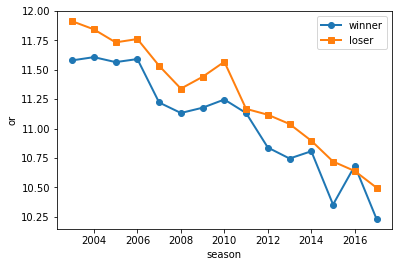

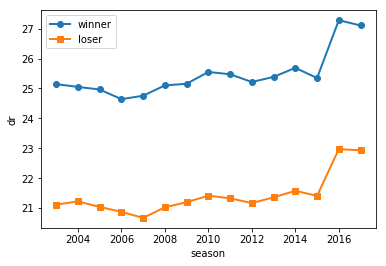

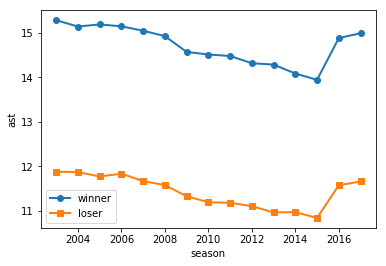

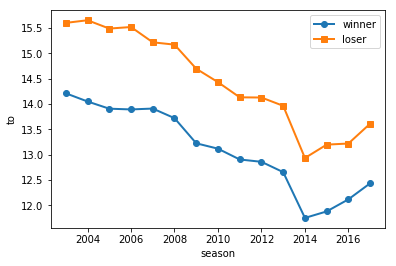

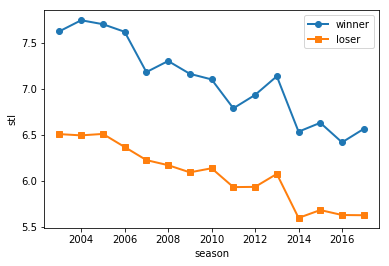

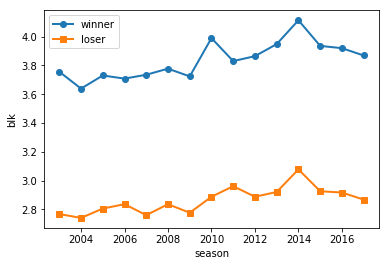

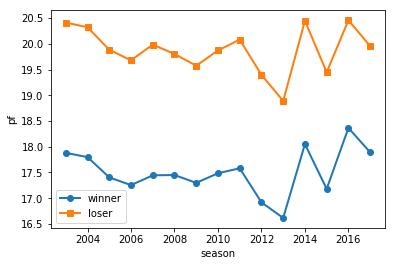

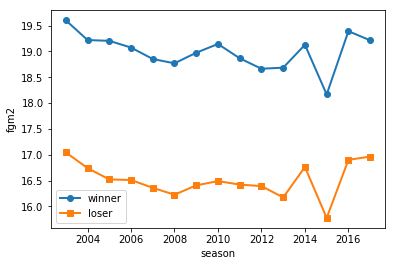

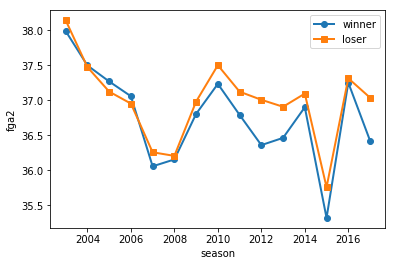

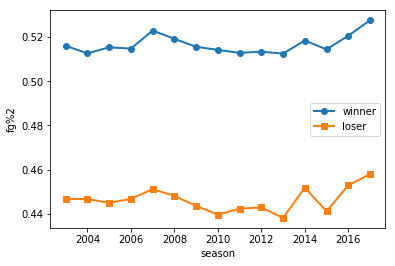

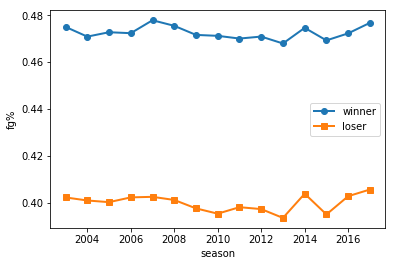

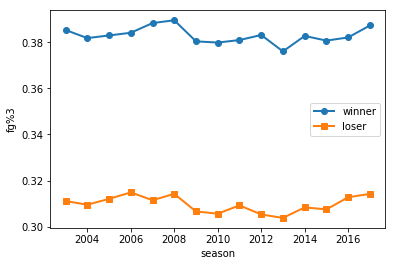

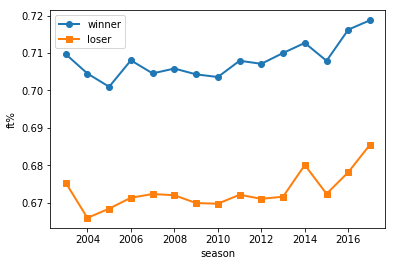

In [345]:
%matplotlib inline
columns = ['score', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
for index, col in enumerate(columns):
    plt.figure(index)
    plt.plot(season_groupby['Season'], season_groupby['W' + col], label='winner', lw=2, marker='o')
    plt.plot(season_groupby['Season'], season_groupby['L' + col], label='loser', lw=2, marker='s')
    plt.legend(loc='best')
    plt.xlabel('season')
    plt.ylabel(col)
    
plt.figure(index + 1)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'] - season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'] - season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm2')
plt.figure(index + 2)
plt.plot(season_groupby['Season'], season_groupby['Wfga'] - season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'] - season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga2')
plt.figure(index + 3)
plt.plot(season_groupby['Season'], (season_groupby['Wfgm'] - season_groupby['Wfgm3'])/(season_groupby['Wfga'] - season_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], (season_groupby['Lfgm'] - season_groupby['Lfgm3'])/(season_groupby['Lfga'] - season_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%2')
plt.figure(index + 4)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(index + 5)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(index + 6)
plt.plot(season_groupby['Season'], season_groupby['Wftm']/season_groupby['Wfta'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lftm']/season_groupby['Lfta'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('ft%')

Index(['Season', 'Daynum', 'Wteam', 'Wscore', 'Lteam', 'Lscore', 'Numot',
       'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr', 'Wast',
       'Wto', 'Wstl', 'Wblk', 'Wpf', 'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm',
       'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf'],
      dtype='object')
